In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
from enmspring.graph_decompose import AtomImportance, Bar4Plot
from enmspring.graphs import Stack
from enmspring.vmddraw import StackWholeMolecule
rootfolder = '/home/yizaochen/codes/dna_rna/fluctmatch_sequence'

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
a_agent = AtomImportance(host, rootfolder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 210 eigenvectors belonging to STRAND1.
There are 189 eigenvectors belonging to STRAND2.
Sum of two strands: 399


#### Check $\lambda_i=q_i^{T}\textbf{A}q_i + q_i^{T}\textbf{D}q_i$

In [17]:
sele_id = 1
eigvalue = a_agent.g_agent.get_eigenvalue_by_id(sele_id)
q = a_agent.g_agent.get_eigenvector_by_id(sele_id)
A = a_agent.g_agent.adjacency_mat
D = a_agent.g_agent.degree_mat
eigvalue_from_decomp = np.dot(q.T, np.dot(A, q)) + np.dot(q.T, np.dot(D, q))
print(f'The {sele_id}-th eigenvalue is: {eigvalue:.3f}')
print(f'The {sele_id}-th eigenvalue from decompose is: {eigvalue_from_decomp:.3f}')

The 1-th eigenvalue is: 19.503
The 1-th eigenvalue from decompose is: 19.503


### Part 2: Bar-Plot for 4 hosts

In [2]:
b_agent = Bar4Plot(rootfolder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 210 eigenvectors belonging to STRAND1.
There are 189 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/atat_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 200 eigenvectors belonging to STRAND1.
There are 199 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setu

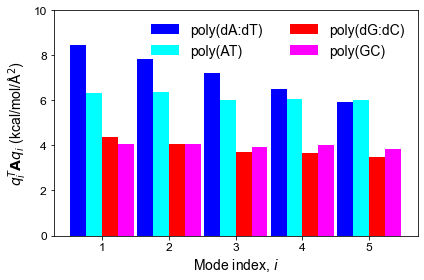

In [4]:
figsize = (6, 4)
small_width = 1
big_width = 1.2
n_modes = 5

b_agent.plot_main(figsize, small_width, big_width, n_modes)
plt.tight_layout()
#plt.savefig('basestack_qTAq.png', dpi=300)
plt.show()

### Part 3: Show edges in molecule for a specific mode

In [53]:
host = 'g_tract_21mer'
g_agent = Stack(host, rootfolder)
g_agent.pre_process()

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 231 eigenvectors belonging to STRAND1.
There are 168 eigenvectors belonging to STRAND2.
Sum of two strands: 399


In [69]:
eigv_id = 5
df = g_agent.get_df_qTAq_for_vmd_draw(eigv_id)
df.head()

,Strand_i,Resid_i,Atomname_i,Strand_j,Resid_j,Atomname_j,qTAq
0,STRAND1,1,N9,STRAND1,2,C8,5.309702e-12
1,STRAND1,1,N9,STRAND1,2,N7,1.485507e-11
2,STRAND1,1,C8,STRAND1,2,N7,2.207921e-11
3,STRAND1,1,N7,STRAND1,2,N7,1.536035e-10
4,STRAND1,1,N7,STRAND1,2,C5,9.389208e-10


In [70]:
filter_criteria = 1e-1
mask = df['qTAq'] > filter_criteria
df1 = df[mask]
print(f'There are {df1.shape[0]} bonds left.')

There are 8 bonds left.


In [71]:
df1

,Strand_i,Resid_i,Atomname_i,Strand_j,Resid_j,Atomname_j,qTAq
216,STRAND1,7,N3,STRAND1,8,C4,0.103760
238,STRAND1,8,C2,STRAND1,9,C4,0.166404
245,STRAND1,8,N3,STRAND1,9,C4,0.337790
248,STRAND1,8,C4,STRAND1,9,C5,0.100293
271,STRAND1,9,N3,STRAND1,10,C4,0.200833
274,STRAND1,9,C4,STRAND1,10,C5,0.127585
329,STRAND1,11,N3,STRAND1,12,C4,0.207458
357,STRAND1,12,N3,STRAND1,13,C4,0.139979


### Part 4: Use DataFrame obtained above to draw important bonds on VMD

In [72]:
pic_out_folder = '/home/yizaochen/Desktop/dna_slide_202102'
draw_agent = StackWholeMolecule(host, rootfolder, pic_out_folder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 231 eigenvectors belonging to STRAND1.
There are 168 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/Desktop/dna_slide_202102/mol_structure exists


In [73]:
radius = 0.2
draw_agent.vmd_show_whole_stack(df1, radius)

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/g_tract_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Desktop/dna_slide_202102/mol_structure/g_tract_21mer_stack_whole_mol
